In [40]:
# Dependencies
import tweepy
import json
import pandas as pd

# Twitter API Keys
consumer_key = "2cyrdUbW1HvQlhWc4k4m0Zf95"
consumer_secret = "G6qlHuggipjMlhFRcLOKM2ecZsHaJJaW0M7fzzR5c7mxJOoAo8"
access_token = "37848462-1chMwv1dYyI3a9peTFRC3K2tte9IkLTCHVoqlhyPb"
access_token_secret = "duYVHKnx1rRQbtzpqbml9eKjOSIADZnJqMCbD1e3pzqLI"

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [61]:
import numpy as np
# Target Search Term
target_terms = ("@BBCWORLD","@nytimes","@CNN","@FOXNEWS","@CBSNEWS")

# Array to hold sentiment
sentiment_array = []

# Variable for holding the oldest tweet
oldest_tweet = ""

sentiment_tot = []
tot_data = []

# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Counter
    counter = 1

    # Loop through 1 times (total of 100 tweets)
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:


                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                tweets_ago = counter
                
                total_tweet = {"User": target,
                     "Compound": compound,
                     "Positive": pos,
                     "Neutral": neg,
                     "Negative": neu,
                     "tweets_ago": counter,
                     "Date": tweet["created_at"],
                     "tweet": tweet['text']} 
                
                tot_data.append(total_tweet)
                
                
                counter = counter + 1
                
    # Store the Average Sentiments
    sentiment = {"User": target,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}
    # Store the Average Sentiments
    sentiment_tot.append(sentiment)
    
    # Print the Sentiments
    print(sentiment)
    print("")

{'User': '@BBCWORLD', 'Compound': -0.18163699999999999, 'Positive': 0.047119999999999995, 'Neutral': 0.13673000000000002, 'Negative': 0.81619000000000019, 'Tweet Count': 100}

{'User': '@nytimes', 'Compound': 0.039362999999999995, 'Positive': 0.069059999999999996, 'Neutral': 0.048739999999999999, 'Negative': 0.88218999999999992, 'Tweet Count': 100}

{'User': '@CNN', 'Compound': -0.00016799999999999649, 'Positive': 0.083190000000000014, 'Neutral': 0.080340000000000009, 'Negative': 0.83645000000000014, 'Tweet Count': 100}

{'User': '@FOXNEWS', 'Compound': 0.047153999999999988, 'Positive': 0.097049999999999984, 'Neutral': 0.067510000000000001, 'Negative': 0.83540999999999987, 'Tweet Count': 100}

{'User': '@CBSNEWS', 'Compound': 0.023787000000000006, 'Positive': 0.094320000000000001, 'Neutral': 0.088650000000000007, 'Negative': 0.81706000000000001, 'Tweet Count': 100}



In [65]:
#Create DF from total sentiment and export to CSV
summary_df = pd.DataFrame.from_dict(sentiment_tot)
summary_df
summary_df.to_csv("Total_Sentiment_media.csv", encoding="utf-8", index=False)
summary_df

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,-0.181637,0.81619,0.13673,0.04712,100,@BBCWORLD
1,0.039363,0.88219,0.04874,0.06906,100,@nytimes
2,-0.000168,0.83645,0.08034,0.08319,100,@CNN
3,0.047154,0.83541,0.06751,0.09705,100,@FOXNEWS
4,0.023787,0.81706,0.08865,0.09432,100,@CBSNEWS


In [66]:
#Create DF from sentiment per tweet and export to CSV
Full_tweet_df = pd.DataFrame.from_dict(tot_data)
Full_tweet_df.to_csv("Sentiment_per_tweet_media.csv", encoding="utf-8", index=False)
Full_tweet_df

,Compound,Date,Negative,Neutral,Positive,User,tweet,tweets_ago
0,0.6166,Wed Mar 07 03:10:27 +0000 2018,0.705,0.000,0.295,@BBCWORLD,RT @BBCWorld: Russia MP: 'I don't feel people ...,1
1,0.0000,Wed Mar 07 03:10:06 +0000 2018,1.000,0.000,0.000,@BBCWORLD,RT @BBCWorld: Making boots from hippopotamus a...,2
2,0.0000,Wed Mar 07 03:09:46 +0000 2018,1.000,0.000,0.000,@BBCWORLD,RT @BBCWorld: Australia and East Timor sign hi...,3
3,0.0000,Wed Mar 07 03:09:34 +0000 2018,1.000,0.000,0.000,@BBCWORLD,RT @BBCWorld: Trump tariffs: President says EU...,4
4,-0.4767,Wed Mar 07 03:09:21 +0000 2018,0.780,0.220,0.000,@BBCWORLD,RT @BBCWorld: 'Haunted by nightmares' of worki...,5
5,0.0000,Wed Mar 07 03:09:11 +0000 2018,1.000,0.000,0.000,@BBCWORLD,@captainNaCl89 @BBCWorld Since 2011 plehboi 😂,6
6,-0.8860,Wed Mar 07 03:08:51 +0000 2018,0.514,0.486,0.000,@BBCWORLD,RT @BBCWorld: Pepe the Frog 'is killed off to ...,7
7,-0.4215,Wed Mar 07 03:08:49 +0000 2018,0.811,0.189,0.000,@BBCWORLD,RT @BBCWorld: Diver swims through thick soup o...,8
8,0.0000,Wed Mar 07 03:08:23 +0000 2018,1.000,0.000,0.000,@BBCWORLD,@Howboutnahb @BBCWorld Obama is probably an at...,9
9,-0.2960,Wed Mar 07 03:08:19 +0000 2018,0.720,0.184,0.096,@BBCWORLD,@BBCWorld England giving a Russian spy a home ...,10


In [67]:
import matplotlib.pyplot as plt
# Obtain the x and y coordinates for each of the news tweets
BBC = Full_tweet_df[Full_tweet_df["User"] == "@BBCWORLD"]
CBS = Full_tweet_df[Full_tweet_df["User"] == "@CBSNEWS"]
NYTIMES = Full_tweet_df[Full_tweet_df["User"] == "@nytimes"]
FOX = Full_tweet_df[Full_tweet_df["User"] == "@FOXNEWS"]
CNN = Full_tweet_df[Full_tweet_df["User"] == "@CNN"]



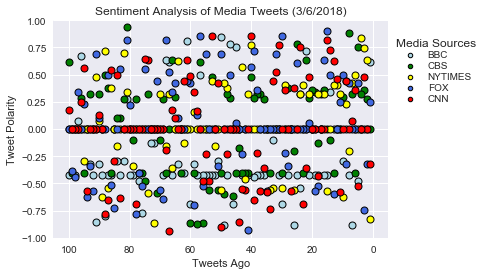

In [68]:
fig, ax = plt.subplots()
# Build the scatter plots for each media type
plt.scatter(BBC['tweets_ago'], 
            BBC['Compound'], 
            c="lightblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="BBC")

plt.scatter(CBS['tweets_ago'], 
            CBS['Compound'], 
            c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="CBS")
plt.scatter(NYTIMES['tweets_ago'], 
            NYTIMES['Compound'], 
            c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="NYTIMES")
plt.scatter(FOX['tweets_ago'], 
            FOX['Compound'], 
            c="royalblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="FOX")
plt.scatter(CNN['tweets_ago'], 
            CNN['Compound'], 
            c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="CNN")


# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (3/6/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((105,-5))
plt.ylim(-1.0,1.0)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc=(1.01,.60), title="Media Sources", 
                  labelspacing=0.2,edgecolor='none')
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
lgnd.legendHandles[3]._sizes = [20]
lgnd.legendHandles[4]._sizes = [20]

sns.set(style="darkgrid")
# Save Figure
plt.savefig("Fig1.png", bbox_inches='tight')

# Show plot
plt.show()

In [69]:
#Create news org field for graph
summary_df['News_org'] = summary_df['User'].str[1:4]
summary_df['News_org'] = summary_df['News_org'].str.upper()
summary_df

,Compound,Negative,Neutral,Positive,Tweet Count,User,News_org
0,-0.181637,0.81619,0.13673,0.04712,100,@BBCWORLD,BBC
1,0.039363,0.88219,0.04874,0.06906,100,@nytimes,NYT
2,-0.000168,0.83645,0.08034,0.08319,100,@CNN,CNN
3,0.047154,0.83541,0.06751,0.09705,100,@FOXNEWS,FOX
4,0.023787,0.81706,0.08865,0.09432,100,@CBSNEWS,CBS


In [70]:
import seaborn as sns
#Create Color Scheme
color=(['lightblue',"yellow","darkgreen","red","royalblue"])


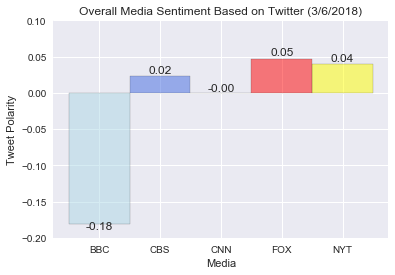

In [72]:
#Build Bar Chart with Labels and color scheme
fig, ax = plt.subplots()
rects1 = ax.bar(summary_df['News_org'], summary_df['Compound'], color=color, alpha=0.5, align="center",width=1,edgecolor='black')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%.2f'% float(height),
                ha='center', va='bottom')

autolabel(rects1)



plt.title("Overall Media Sentiment Based on Twitter (3/6/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Media")
plt.ylim(-0.20,0.1)

# Save Figure
plt.savefig("Fig2.png")

plt.show()